In [1]:
import numpy as np
import mpmath 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from IPython.display import Audio
import math as mth
from time import time
from contextlib import contextmanager
from scipy import linalg, signal, constants, optimize

In [2]:
if False:
    data = np.loadtxt('rho_30dots_fix(1).dat')
    rho_00_dot1 = data[:,0]
    rho_01_dot1 = data[:,1] + 1j*data[:,2]

    rho_00_dot2 = data[:,4]
    rho_01_dot2 = data[:,5] + 1j*data[:,6]
    
    rho_00_dot3 = data[:,8]
    rho_01_dot3 = data[:,9] + 1j*data[:,10]

    rho_00_dot4 = data[:,12]
    rho_01_dot4 = data[:,13] + 1j*data[:,14]
    
    rho_00_dot5 = data[:,16]
    rho_01_dot5 = data[:,17] + 1j*data[:,18]
    
    data = np.loadtxt('rho_3dots_fix.dat')
    rho_00_dot0_3dots = data[:,0]
    rho_01_dot0_3dots = data[:,1] + 1j*data[:,2]

    rho_00_dot1_3dots = data[:,4]
    rho_01_dot1_3dots = data[:,5] + 1j*data[:,6]
    
    rho_00_dot2_3dots = data[:,8]
    rho_01_dot2_3dots = data[:,9] + 1j*data[:,10]
    
    data = np.loadtxt('chi_3dots_fix.dat')
    chi_0rad_elliot_3dots = data[:,0]
    chi_1rad_elliot_3dots = data[:,2]
    chi_2rad_elliot_3dots = data[:,4]

    data = np.loadtxt('rho_2dots_fix_nint.dat')
    rho_00_dot1_nint = data[:,0]
    rho_01_dot1_nint = data[:,1] + 1j*data[:,2]

    rho_00_dot2_nint = data[:,4]
    rho_01_dot2_nint = data[:,5] + 1j*data[:,6]
    
    data = np.loadtxt('rho_30dots_fix_new.dat')
    rho_00_dot1_nint_new = data[:,0]
    rho_01_dot1_nint_new = data[:,1] + 1j*data[:,2]

    rho_00_dot2_nint_new = data[:,4]
    rho_01_dot2_nint_new = data[:,5] + 1j*data[:,6]
    
    data = np.loadtxt('initial_guess.txt')
    initial_guess = data
    
    data = np.loadtxt('dots_3dots.cfg')
    x_coord = data[:,0]
    y_coord = data[:,1]
    z_coord = data[:,2]
    

    np.savez('Elliot_30dot_data.npz',rho_00_dot1=rho_00_dot1,
        rho_01_dot1=rho_01_dot1,
        rho_00_dot2=rho_00_dot2,
        rho_01_dot2=rho_01_dot2,
        rho_00_dot3=rho_00_dot3,
        rho_01_dot3=rho_01_dot3,
        rho_00_dot4=rho_00_dot4,
        rho_01_dot4=rho_01_dot4,
        rho_00_dot5=rho_00_dot5,
        rho_01_dot5=rho_01_dot5,
        rho_00_dot0_3dots = rho_00_dot0_3dots,
        rho_01_dot0_3dots = rho_01_dot0_3dots,
        rho_00_dot1_3dots = rho_00_dot1_3dots,
        rho_01_dot1_3dots = rho_01_dot1_3dots,
        rho_00_dot2_3dots = rho_00_dot2_3dots,
        rho_01_dot2_3dots = rho_01_dot2_3dots,
        chi_0rad_elliot_3dots = chi_0rad_elliot_3dots,
        chi_1rad_elliot_3dots = chi_1rad_elliot_3dots,
        chi_2rad_elliot_3dots = chi_2rad_elliot_3dots,
        rho_00_dot1_nint=rho_00_dot1_nint,
        rho_01_dot1_nint=rho_01_dot1_nint,
        rho_00_dot2_nint=rho_00_dot2_nint,
        rho_01_dot2_nint=rho_01_dot2_nint,
        rho_00_dot1_nint_new=rho_00_dot1_nint_new,
        rho_01_dot1_nint_new=rho_01_dot1_nint_new,
        rho_00_dot2_nint_new=rho_00_dot2_nint_new,
        rho_01_dot2_nint_new=rho_01_dot2_nint_new,
             x_coord=x_coord,
             y_coord=y_coord,
             z_coord=z_coord,
            initial_guess=initial_guess)

In [3]:
data = np.loadtxt('chi_30dots_fix(1).dat')
chi_rad_elliot = np.vstack((data[:,0],data[:,2],data[:,4],data[:,6],data[:,8])).T

In [4]:
data = np.load('Elliot_30dot_data.npz')
rho_00_dot1 = data['rho_00_dot1']
rho_01_dot1 = data['rho_01_dot1']
rho_00_dot2 = data['rho_00_dot2']
rho_01_dot2 = data['rho_01_dot2']
rho_00_dot3 = data['rho_00_dot3']
rho_01_dot3 = data['rho_01_dot3']
rho_00_dot4 = data['rho_00_dot4']
rho_01_dot4 = data['rho_01_dot4']
rho_00_dot5 = data['rho_00_dot5']
rho_01_dot5 = data['rho_01_dot5']
rho_00_dot1_nint = data['rho_00_dot1_nint']
rho_01_dot1_nint = data['rho_01_dot1_nint']
rho_00_dot2_nint = data['rho_00_dot2_nint']
rho_01_dot2_nint = data['rho_01_dot2_nint']
rho_00_dot1_nint_new = data['rho_00_dot1_nint_new']
rho_01_dot1_nint_new = data['rho_01_dot1_nint_new']
rho_00_dot2_nint_new = data['rho_00_dot2_nint_new']
rho_01_dot2_nint_new = data['rho_01_dot2_nint_new']
x_coord = data['x_coord']
y_coord = data['y_coord']
z_coord = data['z_coord']
rho_00_dot0_3dots = data['rho_00_dot0_3dots']
rho_01_dot0_3dots = data['rho_01_dot0_3dots']
rho_00_dot1_3dots = data['rho_00_dot1_3dots']
rho_01_dot1_3dots = data['rho_01_dot1_3dots']
rho_00_dot2_3dots = data['rho_00_dot2_3dots']
rho_01_dot2_3dots = data['rho_01_dot2_3dots']
chi_0rad_elliot_3dots = data['chi_0rad_elliot_3dots']
chi_1rad_elliot_3dots = data['chi_1rad_elliot_3dots']
chi_2rad_elliot_3dots = data['chi_2rad_elliot_3dots']
initial_guess = data['initial_guess']

In [5]:
@contextmanager
def timer(prefix=None):
    t_start = time()
    yield
    t_end = time()
    t = t_end - t_start
    
    minutes = np.floor(t / 60)
    seconds = t % 60
    if prefix is None:
        print(minutes,'minutes',seconds,'seconds')
        
    else:
        print(prefix+':',minutes,'minutes',seconds,'seconds')

In [6]:
def get_uvw(rho_00,rho_01):
    u = 2*rho_01.real
    v = 2*rho_01.imag
    w = 1-2*rho_00
    return u,v,w

In [7]:
u1_elliot,v1_elliot,w1_elliot = get_uvw(rho_00_dot1,rho_01_dot1)
u2_elliot,v2_elliot,w2_elliot = get_uvw(rho_00_dot2,rho_01_dot2)
u3_elliot,v3_elliot,w3_elliot = get_uvw(rho_00_dot3,rho_01_dot3)
u4_elliot,v4_elliot,w4_elliot = get_uvw(rho_00_dot4,rho_01_dot4)
u5_elliot,v5_elliot,w5_elliot = get_uvw(rho_00_dot5,rho_01_dot5)

u1_elliot_nint,v1_elliot_nint,w1_elliot_nint = get_uvw(rho_00_dot1_nint,rho_01_dot1_nint)
u2_elliot_nint,v2_elliot_nint,w2_elliot_nint = get_uvw(rho_00_dot2_nint,rho_01_dot2_nint)

u1_elliot_nint_new,v1_elliot_nint_new,w1_elliot_nint_new = get_uvw(rho_00_dot1_nint_new,rho_01_dot1_nint_new)
u2_elliot_nint_new,v2_elliot_nint_new,w2_elliot_nint_new = get_uvw(rho_00_dot2_nint_new,rho_01_dot2_nint_new)

u1_3dots,v1_3dots,w1_3dots = get_uvw(rho_00_dot0_3dots,rho_01_dot0_3dots)
u2_3dots,v2_3dots,w2_3dots = get_uvw(rho_00_dot1_3dots,rho_01_dot1_3dots)
u3_3dots,v3_3dots,w3_3dots = get_uvw(rho_00_dot2_3dots,rho_01_dot2_3dots)

t_elliot = np.linspace(0,10,u1_elliot.size)

In [8]:
def compare_frequency_spectra_solutions(signal_t_1,signal_t_2,t,minimum_f=None,maximum_f=None,sol=' Guess',vline=False):
    #plots the freq spec for a given signal.  minimum_f and maximum_f must be in Hz. signal is the variable name
    stop_time = t[-1]
    dt = stop_time/t.size
    
    Signal_w_1 = np.fft.fftshift(np.fft.fft(signal_t_1))
    Signal_w_2 = np.fft.fftshift(np.fft.fft(signal_t_2))
    freq = np.fft.fftshift(np.fft.fftfreq(signal_t_1.size,dt))

   
    plt.figure()
    plt.semilogy(freq,abs(Signal_w_1),label='Chad'+sol)
    plt.semilogy(freq,abs(Signal_w_2),label='Elliot Solution')
    if vline == True:
        for frequency in omega_k/(2*np.pi):
            plt.axvline(frequency,c='k')
    plt.legend()
    plt.grid()
    plt.xlabel('Linear Frequency')
    plt.xlim(minimum_f,maximum_f)
    plt.ylabel('|Magnitude|')

    plt.figure()
    plt.plot(freq,np.angle(Signal_w_1,deg=True),label='Chad'+sol)
    plt.plot(freq,np.angle(Signal_w_2,deg=True),label='Elliots Solution')
    if vline == True:
        for frequency in omega_k/(2*np.pi):
            plt.axvline(frequency,c='k')
    plt.ylabel('Phase (degrees)')
    plt.xlabel('Linear Frequency')
    plt.xlim(minimum_f,maximum_f)
    plt.legend()

In [9]:
#General Parameters
dot_coupling = True

num_dots = 3
omega_0 = 2278.9013 # in rad/picosecond
period = 2*np.pi / omega_0
f0 = omega_0 / (2*np.pi)

stop_time = 10 #in picoseconds

#Dot parameters
sigma = 2278.9013
t0 = 1.0
hbar = 0.65821193
T1 = 1e6
T2 = 2e6

#Misc Parameters
x_hat = np.array([1,0,0])
y_hat = np.array([0,1,0])

c0 = 299.792458 #um/ps
mu0 = 2.0133545e-04
eps0 = 1/(mu0*c0**2)
d = 5.2917721e-4
d_vector = d*x_hat
E0 = 1558.8929

omega_r = d*E0/hbar
# f_r = 2.2669
#omega_r = 2*np.pi*f_r

In [10]:
if dot_coupling:
    delta_f = 1
    delta_omega = 2*np.pi*delta_f
    B = 4
    C = 1
    i = np.arange(B+1)
    j = np.arange(-B,B+1)
    k = np.arange(-C,C+1)

    i,j,k = np.meshgrid(i,j,k,indexing='ij')
    ij_sum_abs = abs(i) + abs(j)
    ij = ij_sum_abs<=B
    i = i[ij]
    j = j[ij]
    k = k[ij]

    omega_k = i * omega_0 + j * omega_r + k * delta_omega
    
else:
    B = 5
    i = np.arange(B+1)
    j = np.arange(-B,B+1)

    i,j = np.meshgrid(i,j)
    ij_sum_abs = abs(i) + abs(j)
    ij = ij_sum_abs<=B
    i = i[ij]
    j = j[ij]
    

    omega_k = i * omega_0 + j * omega_r
omega_k = omega_k[omega_k>=0]
omega_k = np.sort(omega_k)
omega_k = np.unique(omega_k)

num_frequencies = omega_k.size
num_coefficients = 2*num_frequencies - 1

print('Solving',num_frequencies,'frequencies')
print('Solving',num_coefficients,'coefficients per signal')

Solving 62 frequencies
Solving 123 coefficients per signal


In [11]:
x_coord = x_coord[:num_dots]
y_coord = y_coord[:num_dots]
z_coord = z_coord[:num_dots]

In [12]:
Rx = x_coord[:,np.newaxis] - x_coord[:,np.newaxis].T
Ry = y_coord[:,np.newaxis] - y_coord[:,np.newaxis].T
Rz = z_coord[:,np.newaxis] - z_coord[:,np.newaxis].T

dots_to_R = np.sqrt(Rx**2 + Ry**2 + Rz**2)
Rdiag = np.diag(np.ones(x_coord.size))

dots_to_R += Rdiag
dots_to_R_vector = np.concatenate((Rx[:,:,np.newaxis],Ry[:,:,np.newaxis],Rz[:,:,np.newaxis]),axis = 2)
dots_to_R_vector *= -1
rhats = dots_to_R_vector / dots_to_R[:,:,np.newaxis]
print(x_coord)

[0. 0. 0.]


In [13]:
dots = np.arange(num_dots)
rec_to_rad = np.zeros((num_dots,num_dots),dtype=int)
for dot in rec_to_rad:
    dot += dots
for i,rec in enumerate(rec_to_rad):
    for j,rad in enumerate(rec):
        if i==j:
            rec_to_rad[i,j] = -1
rec_to_rad = np.sort(rec_to_rad)
rec_to_rad = rec_to_rad[:,1:]

In [14]:
def get_gamma(t):
    #Creates a matrix of trigonometric basis functions
    return np.hstack((np.cos(omega_k*t[:,np.newaxis]),np.sin(omega_k[1:]*t[:,np.newaxis])))

In [15]:
def get_gamma_t0(t0):
    #Creates a matrix of trigonometric basis functions evaluated at an instant in time, t0
    #Used for enforcing initial conditions in the Newton Solver
    return np.hstack((np.cos(omega_k*t0),np.sin(omega_k[1:]*t0)))

In [16]:
def get_gamma_prime(t):
    #Creates a matrix of derivatives of trig basis functions
    return np.hstack((-omega_k*np.sin(omega_k*t[:,np.newaxis]),omega_k[1:]*np.cos(omega_k[1:]*t[:,np.newaxis])))

In [17]:
def get_gamma_double_prime(t):
    #Second derivative matrix
    return np.hstack((-omega_k**2*np.cos(omega_k*t[:,np.newaxis]),-omega_k[1:]**2*np.sin(omega_k[1:]*t[:,np.newaxis])))

In [18]:
def get_rhos(u,v,w):
    rho_00 = 0.5 - 0.5*w
    rho_01 = 0.5*u + 0.5j*v
    return rho_00, rho_01

In [19]:
def get_P(u_coeff,v_coeff,w_coeff,t,R):
    #Evaluates the polarization
    delay = t - (R/c0)
    gamma_delay = get_gamma(delay)
    
    u_delay = gamma_delay@u_coeff
    v_delay = gamma_delay@v_coeff
    w_delay = gamma_delay@w_coeff
    
    rho_00_delay,rho_01_delay = get_rhos(u_delay,v_delay,w_delay)
    
    P = 2*(rho_01_delay.real)*d_vector[:,np.newaxis]
    
    return P

In [20]:
def get_P_prime(u_coeff,v_coeff,w_coeff,t,R):
    delay = t - (R/c0)
    gamma_prime_delay = get_gamma_prime(delay)
    u_prime_delay = gamma_prime_delay@u_coeff
    v_prime_delay = gamma_prime_delay@v_coeff
    w_prime_delay = gamma_prime_delay@w_coeff
    
    rho_00_prime_delay,rho_01_prime_delay = get_rhos(u_prime_delay,v_prime_delay,w_prime_delay)
    P_prime = 2*(rho_01_prime_delay.real)*d_vector[:,np.newaxis]
    
    return P_prime

In [21]:
def get_P_doubleprime(u_coeff,v_coeff,w_coeff,t,R):
    delay = t - (R/c0)
    gamma_doubleprime = get_gamma_double_prime(delay)
    u_doubleprime_delay = gamma_doubleprime@u_coeff
    v_doubleprime_delay = gamma_doubleprime@v_coeff
    w_doubleprime_delay = gamma_doubleprime@w_coeff
    
    rho_00_doubleprime_delay,rho_01_doubleprime_delay = get_rhos(u_doubleprime_delay,v_doubleprime_delay,w_doubleprime_delay)
    P_doubleprime = 2*(rho_01_doubleprime_delay.real)*d_vector[:,np.newaxis]
    
    return P_doubleprime

In [22]:
def get_E_rad(u_coeff,v_coeff,w_coeff,t,r_hat,R):
    #Evaluates the radiation field from one dot onto another
    P = get_P(u_coeff,v_coeff,w_coeff,t,R)
    P_prime = get_P_prime(u_coeff,v_coeff,w_coeff,t,R)
    P_doubleprime = get_P_doubleprime(u_coeff,v_coeff,w_coeff,t,R)
    
    I = np.eye(3)
    
    E_rad = np.dot(I - np.outer(r_hat,r_hat),P_doubleprime)/(c0**2*R)
    
    E_rad += np.dot(I-3*np.outer(r_hat,r_hat),P_prime)/(c0*R**2)

    E_rad += np.dot(I-3*np.outer(r_hat,r_hat),P)/R**3
    
    E_rad *= -1/(4*np.pi*eps0)
    
    if dot_coupling:
        return E_rad
    else:
        return E_rad*0

In [23]:
t_k = np.linspace(0,100*stop_time,num_coefficients - 1)

In [24]:
def get_dEr_dau(rec_dot,rad_dot,t=t_k):
    R = dots_to_R[rec_dot,rad_dot]
    delay = t - (R/c0)
    
    d_Pdoubleprime_dau = -omega_k**2*np.cos(omega_k*delay[:,np.newaxis])*d_vector[:,np.newaxis,np.newaxis]
    
    d_Pprime_dau = -omega_k*np.sin(omega_k*delay[:,np.newaxis])*d_vector[:,np.newaxis,np.newaxis]
    
    d_P_dau = np.cos(omega_k*delay[:,np.newaxis])*d_vector[:,np.newaxis,np.newaxis]
    
    d_Pdoubleprime_dau = np.transpose(d_Pdoubleprime_dau,(1,0,2))
    d_Pprime_dau = np.transpose(d_Pprime_dau,(1,0,2))
    d_P_dau = np.transpose(d_P_dau,(1,0,2))
    
    I = np.eye(3)
    dEr_dau = (np.dot((I - np.outer(rhats[rec_dot,rad_dot,:],rhats[rec_dot,rad_dot,:])),d_Pdoubleprime_dau)/(c0**2*R)
              + np.dot((I - 3*np.outer(rhats[rec_dot,rad_dot,:],rhats[rec_dot,rad_dot,:])),d_Pprime_dau)/(c0*R**2)
              + np.dot((I - 3*np.outer(rhats[rec_dot,rad_dot,:],rhats[rec_dot,rad_dot,:])),d_P_dau)/R**3)
    dEr_dau *= -1/(4*np.pi*eps0)
    dEr_dau = np.transpose(dEr_dau,(1,0,2))
    
    return dEr_dau

In [25]:
def get_dEr_dbu(rec_dot,rad_dot,t=t_k):
    R = dots_to_R[rec_dot,rad_dot]
    delay = t - (R/c0)
    
    d_Pdoubleprime_dbu = -omega_k[1:]**2*np.sin(omega_k[1:]*delay[:,np.newaxis])*d_vector[:,np.newaxis,np.newaxis]
    
    d_Pprime_dbu = omega_k[1:]*np.cos(omega_k[1:]*delay[:,np.newaxis])*d_vector[:,np.newaxis,np.newaxis]
    
    d_P_dbu = np.sin(omega_k[1:]*delay[:,np.newaxis])*d_vector[:,np.newaxis,np.newaxis]
    
    d_Pdoubleprime_dbu = np.transpose(d_Pdoubleprime_dbu,(1,0,2))
    d_Pprime_dbu = np.transpose(d_Pprime_dbu,(1,0,2))
    d_P_dbu = np.transpose(d_P_dbu,(1,0,2))
    
    I = np.eye(3)
    dEr_dbu = (np.dot((I - np.outer(rhats[rec_dot,rad_dot,:],rhats[rec_dot,rad_dot,:])),d_Pdoubleprime_dbu)/(c0**2*R)
              + np.dot((I - 3*np.outer(rhats[rec_dot,rad_dot,:],rhats[rec_dot,rad_dot,:])),d_Pprime_dbu)/(c0*R**2)
              + np.dot((I - 3*np.outer(rhats[rec_dot,rad_dot,:],rhats[rec_dot,rad_dot,:])),d_P_dbu)/R**3)
    dEr_dbu *= -1/(4*np.pi*eps0)
    dEr_dbu = np.transpose(dEr_dbu,(1,0,2))
    
    return dEr_dbu

In [26]:
def get_Jacobian_Block(coefficients,rec_dot,t):
    gamma_t = get_gamma(t)
    
    u = gamma_t@coefficients[:,3*rec_dot]
    v = gamma_t@coefficients[:,3*rec_dot+1]
    w = gamma_t@coefficients[:,3*rec_dot+2]
    
    chi = get_chi(rec_dot,coefficients,t_k)
    df1_dau = omega_k*np.sin(omega_k*t[:,np.newaxis])
    df1_dbu = -omega_k[1:]*np.cos(omega_k[1:]*t[:,np.newaxis])
    df1_dav = -omega_0*np.cos(omega_k*t[:,np.newaxis])
    df1_dbv = -omega_0*np.sin(omega_k[1:]*t[:,np.newaxis])
    df1_daw = np.zeros_like(df1_dau)
    df1_dbw = np.zeros_like(df1_dbu)
    grad_f1 = np.hstack((df1_dau,df1_dbu,df1_dav,df1_dbv,df1_daw,df1_dbw))
    
    df2_dau = omega_0*np.cos(omega_k*t[:,np.newaxis])
    df2_dbu = omega_0*np.sin(omega_k[1:]*t[:,np.newaxis])
    df2_dav = omega_k*np.sin(omega_k*t[:,np.newaxis])
    df2_dbv = -omega_k[1:]*np.cos(omega_k[1:]*t[:,np.newaxis])
    df2_daw = -2*chi[:,np.newaxis]*np.cos(omega_k*t[:,np.newaxis])
    df2_dbw = -2*chi[:,np.newaxis]*np.sin(omega_k[1:]*t[:,np.newaxis])
    grad_f2 = np.hstack((df2_dau,df2_dbu,df2_dav,df2_dbv,df2_daw,df2_dbw))
    
    df3_dau = np.zeros_like(df1_dau)
    df3_dbu = np.zeros_like(df1_dbu)
    df3_dav = 2*chi[:,np.newaxis]*np.cos(omega_k*t[:,np.newaxis])
    df3_dbv = 2*chi[:,np.newaxis]*np.sin(omega_k[1:]*t[:,np.newaxis])
    df3_daw = omega_k*np.sin(omega_k*t[:,np.newaxis])
    df3_dbw = -omega_k[1:]*np.cos(omega_k[1:]*t[:,np.newaxis])
    grad_f3 = np.hstack((df3_dau,df3_dbu,df3_dav,df3_dbv,df3_daw,df3_dbw))
    
    df4_dau = np.ones(omega_k.size)[:,np.newaxis].T
    df4_dbu = np.zeros(omega_k[1:].size)[:,np.newaxis].T
    df4_dav = np.zeros_like(df4_dau)
    df4_dbv = np.zeros_like(df4_dbu)
    df4_daw = np.zeros_like(df4_dau)
    df4_dbw = np.zeros_like(df4_dbu)
    grad_f4 = np.hstack((df4_dau,df4_dbu,df4_dav,df4_dbv,df4_daw,df4_dbw))
    
    df5_dau = np.zeros(omega_k.size)[:,np.newaxis].T
    df5_dbu = np.zeros(omega_k[1:].size)[:,np.newaxis].T
    df5_dav = np.ones_like(df4_dau)
    df5_dbv = np.zeros_like(df4_dbu)
    df5_daw = np.zeros_like(df4_dau)
    df5_dbw = np.zeros_like(df4_dbu)
    grad_f5 = np.hstack((df5_dau,df5_dbu,df5_dav,df5_dbv,df5_daw,df5_dbw))
    
    df6_dau = np.zeros(omega_k.size)[:,np.newaxis].T
    df6_dbu = np.zeros(omega_k[1:].size)[:,np.newaxis].T
    df6_dav = np.zeros_like(df4_dau)
    df6_dbv = np.zeros_like(df4_dbu)
    df6_daw = np.ones_like(df4_dau)
    df6_dbw = np.zeros_like(df4_dbu)
    grad_f6 = np.hstack((df6_dau,df6_dbu,df6_dav,df6_dbv,df6_daw,df6_dbw))
    
    Jacobian_Block = np.vstack((grad_f1,grad_f2,grad_f3,grad_f4,grad_f5,grad_f6))
 
    return Jacobian_Block

In [27]:
def get_off_diag_block(coefficients,rec_dot,rad_dot,t):
    gamma_t = get_gamma(t)
    
    u = gamma_t@coefficients[:,3*rec_dot]
    v = gamma_t@coefficients[:,3*rec_dot+1]
    w = gamma_t@coefficients[:,3*rec_dot+2]
    
    chi = get_chi(rec_dot,coefficients,t)
    
    if dot_coupling:
        dChi_dau = get_dChi_dau(rec_dot,rad_dot,t)
        dChi_dbu = get_dChi_dbu(rec_dot,rad_dot,t)
    else:
        dChi_dau = np.zeros((t.size,omega_k.size))
        dChi_dbu = np.zeros((t.size,omega_k[1:].size))
        
    df1_dau = np.zeros((t.size,omega_k.size))
    df1_dbu = np.zeros((t.size,omega_k[1:].size))
    df1_dav = np.zeros_like(df1_dau)
    df1_dbv = np.zeros_like((df1_dbu))
    df1_daw = np.zeros_like(df1_dau)
    df1_dbw = np.zeros_like(df1_dbu)
    grad_f1 = np.hstack((df1_dau,df1_dbu,df1_dav,df1_dbv,df1_daw,df1_dbw))
    
    df2_dau = -2*dChi_dau*w[:,np.newaxis]
    df2_dbu = -2*dChi_dbu*w[:,np.newaxis]
    df2_dav = np.zeros_like(df1_dau)
    df2_dbv = np.zeros_like(df1_dbu)
    df2_daw = np.zeros_like(df1_dau)
    df2_dbw = np.zeros_like(df1_dbu)
    grad_f2 = np.hstack((df2_dau,df2_dbu,df2_dav,df2_dbv,df2_daw,df2_dbw))
    
    df3_dau = 2*dChi_dau*v[:,np.newaxis]
    df3_dbu = 2*dChi_dbu*v[:,np.newaxis]
    df3_dav = np.zeros_like(df1_dau)
    df3_dbv = np.zeros_like(df1_dbu)
    df3_daw = np.zeros_like(df1_dau)
    df3_dbw = np.zeros_like(df1_dbu)
    grad_f3 = np.hstack((df3_dau,df3_dbu,df3_dav,df3_dbv,df3_daw,df3_dbw))
    
    df4_dau = np.zeros(omega_k.size)
    df4_dbu = np.zeros(omega_k[1:].size)
    df4_dav = np.zeros_like(df4_dau)
    df4_dbv = np.zeros_like(df4_dbu)
    df4_daw = np.zeros_like(df4_dau)
    df4_dbw = np.zeros_like(df4_dbu)
    grad_f4 = np.hstack((df4_dau,df4_dbu,df4_dav,df4_dbv,df4_daw,df4_dbw))
    
    df5_dau = np.zeros_like(df4_dau)
    df5_dbu = np.zeros_like(df4_dbu)
    df5_dav = np.zeros_like(df4_dau)
    df5_dbv = np.zeros_like(df4_dbu)
    df5_daw = np.zeros_like(df4_dau)
    df5_dbw = np.zeros_like(df4_dbu)
    grad_f5 = np.hstack((df5_dau,df5_dbu,df5_dav,df5_dbv,df5_daw,df5_dbw))
    
    df6_dau = np.zeros_like(df4_dau)
    df6_dbu = np.zeros_like(df4_dbu)
    df6_dav = np.zeros_like(df4_dau)
    df6_dbv = np.zeros_like(df4_dbu)
    df6_daw = np.zeros_like(df4_dau)
    df6_dbw = np.zeros_like(df4_dbu)
    grad_f6 = np.hstack((df6_dau,df6_dbu,df6_dav,df6_dbv,df6_daw,df6_dbw))

    Jacobian_Block = np.vstack((grad_f1,grad_f2,grad_f3,grad_f4,grad_f5,grad_f6))
 
    return Jacobian_Block

In [28]:
def get_Jacobian(coefficients,t):
    dummy_block = np.zeros((3*t.size+3,3*(2*omega_k.size - 1)))
    dummy_gradient = np.zeros((3*t.size+3,3*num_dots*(2*omega_k.size - 1)))
    Jacobian = np.hstack((dummy_block,dummy_gradient))
    for rec_dot in range(num_dots):
    
        grad_rec_dot = dummy_block
        for dot in range(num_dots):
            
            if dot==rec_dot:
                grad_rec_dot = np.hstack((grad_rec_dot,get_Jacobian_Block(coefficients,dot,t)))
            else:
                if dot_coupling:
                    off_diag_block = get_off_diag_block(coefficients,rec_dot,dot,t)
                else:
                    off_diag_block = dummy_block
                
                grad_rec_dot = np.hstack((grad_rec_dot,off_diag_block))
                  
        Jacobian = np.vstack((Jacobian,grad_rec_dot))
    
    Jacobian = Jacobian[(3*t.size + 3):,3*(2*omega_k.size - 1):]
    return Jacobian

In [29]:
def plot_error(t,f1,f2,f3,f4,f5,f6):
    plt.figure()
    plt.semilogy(t,abs(f1),label='f1')
    plt.semilogy(t,abs(f2),label='f2')
    plt.semilogy(t,abs(f3),label='f3')
    plt.legend()
    plt.show()

In [30]:
def get_radiated_fields(coeff,dot_number,t):
    E = get_E_rad(coeff[:,0],coeff[:,1],coeff[:,2],t,rhats[0,1,:],dots_to_R[0,1])*0
    
    for rad_dot in rec_to_rad[dot_number,:]:
        E += get_E_rad(coeff[:,3*dot_number],coeff[:,3*dot_number+1],coeff[:,3*dot_number+2],t,rhats[dot_number,rad_dot,:],dots_to_R[dot_number,rad_dot])
        
    return E

In [31]:
def get_chi(rec_dot,coeff,t=t_k,comp_plot=None):
    wave_vector = x_hat*0.0
    r = x_hat*0.0
    args = np.dot(wave_vector,r) - omega_0*(t-t0)
    pulse = 1
    El = (E0*np.cos(args)*pulse)*x_hat[:,np.newaxis]
    
    E_rad = get_radiated_fields(coeff,rec_dot,t)

    if comp_plot == True:
        chi_rad_chad = np.dot(d_vector,E_rad)/hbar
        chi_rad_elli = chi_rad_elliot[:,rec_dot]
        plt.figure()
        plt.plot(t,chi_rad_chad,label='Chi rad Chad')
        plt.plot(t,chi_rad_elli,label='Chi rad Elliot')
        plt.xlabel('time (ps)')
        plt.legend()
        
        plt.figure()
        plt.plot(t,chi_rad_chad,label='Chi rad Chad')
        plt.plot(t,chi_rad_elli,label='Chi rad Elliot')
        plt.xlabel('time (ps)')
        plt.legend()
        plt.xlim(4,4.1)
        plt.show()
        
        compare_frequency_spectra_solutions(chi_rad_chad,chi_rad_elli,t_elliot,360,370,vline=True)
        E_rad_error = linalg.norm(chi_rad_chad - chi_rad_elli) / linalg.norm(chi_rad_elli)
        print('Relative error:',E_rad_error)
        
    E = El + E_rad
    chi = np.dot(d_vector,E) / hbar
    
    return chi

In [32]:
def get_chi_rad(rec_dot,coeff,t=t_k):
    wave_vector = x_hat*0.0
    r = x_hat*0.0
    args = np.dot(wave_vector,r) - omega_0*(t-t0)
    pulse = 1
    El = (E0*np.cos(args)*pulse)*x_hat[:,np.newaxis]
    
    E_rad = get_radiated_fields(coeff,rec_dot,t)

    chi_rad = np.dot(d_vector,E_rad) / hbar
    
    return chi_rad

In [33]:
def get_dChi_dau(rec_dot,rad_dot,t=t_k):
    E_rad_prime = get_dEr_dau(rec_dot,rad_dot,t)
    dChi_dau = np.dot(d_vector,E_rad_prime) / hbar
    return dChi_dau

In [34]:
def get_dChi_dbu(rec_dot,rad_dot,t=t_k):
    E_rad_prime = get_dEr_dbu(rec_dot,rad_dot,t)
    dChi_dbu = np.dot(d_vector,E_rad_prime) / hbar
    return dChi_dbu

In [35]:
def get_dot_error(coeff,dot_number,t=t_k):
    gamma_t = get_gamma(t)
    gamma_prime = get_gamma_prime(t)
    gamma_0 = get_gamma_t0(0)
    
    chi = get_chi(dot_number,coeff,t)
    
    u = gamma_t@coeff[:,3*dot_number]
    v = gamma_t@coeff[:,3*dot_number+1]
    w = gamma_t@coeff[:,3*dot_number+2]
    
    u_prime = gamma_prime@coeff[:,3*dot_number]
    v_prime = gamma_prime@coeff[:,3*dot_number+1]
    w_prime = gamma_prime@coeff[:,3*dot_number+2]
    
    u_0 = gamma_0@coeff[:,3*dot_number]
    v_0 = gamma_0@coeff[:,3*dot_number+1]
    w_0 = gamma_0@coeff[:,3*dot_number+2]
    
    f1 = -omega_0*v - u_prime
    f2 = omega_0*u - 2*chi*w - v_prime
    f3 = 2*chi*v - w_prime
    f4 = u_0
    f5 = v_0
    f6 = w_0 + 1
    return np.hstack((f1,f2,f3,f4,f5,f6))

In [36]:
def get_system_error(coeff,t=t_k):
    fk = np.zeros(1)
    for dot in range(num_dots):
        f = get_dot_error(coeff,dot,t)
        fk = np.hstack((fk,f))
    fk = fk[1:]
    return fk

In [37]:
def Newton(coeff_guess,t=t_k,eps=1e-8):
    max_iteration = 100000
    fk = get_system_error(coeff_guess,t)
    coeff = coeff_guess

    for iteration in range(max_iteration):
        print('iteration:',iteration,'f mean',np.mean(abs(fk)),'f max',np.max(abs(fk)))
        if np.mean(abs(fk))<eps:
            print('Converged after',iteration,'iterations')
            return coeff
        
        Jacobian = get_Jacobian(coeff,t)
        delta_coeff = linalg.solve(Jacobian,fk)
        print('Jacobian Rank',np.linalg.matrix_rank(Jacobian),'Num unknowns',fk.size)
        coefficients = np.ravel(coeff.T)
        coefficients -= delta_coeff
        coeff = np.reshape(coefficients,(coeff.shape[1],coeff.shape[0])).T
    
        fk = get_system_error(coeff,t)
        plt.figure()
        plt.semilogy(abs(fk))
        plt.show()
        
    print('Exceeded Maximum Iterations')

In [40]:
gamma = get_gamma(t_elliot)
sol_dot = np.vstack((u1_elliot_nint,v1_elliot_nint,w1_elliot_nint))
sol = sol_dot
for dot in range(num_dots-1):
    sol = np.vstack((sol,sol_dot))

b = sol.T


#b = np.vstack((u1_elliot_nint,v1_elliot_nint,w1_elliot_nint,u2_elliot_nint,v2_elliot_nint,w2_elliot_nint)).T

x = linalg.lstsq(gamma,b)[0]
#x = x.reshape((num_coefficients,num_dots,3)).transpose((0,2,1))

In [41]:
coefficients_guess = x.copy()

In [42]:
time_guess = gamma@x 

u1_guess = time_guess[:,0]
v1_guess = time_guess[:,1]
w1_guess = time_guess[:,2]

u2_guess = time_guess[:,3]
v2_guess = time_guess[:,4]
w2_guess = time_guess[:,5]

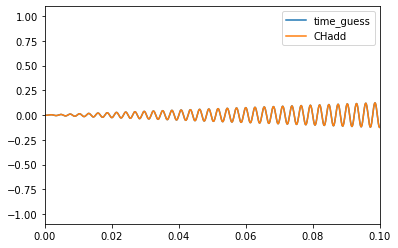

In [43]:
plt.figure()
plt.plot(t_elliot,u2_guess,label='time_guess')
plt.plot(t_elliot,gamma@x[:,3],label='CHadd')
plt.xlim(0,0.1)
plt.legend()
plt.show()

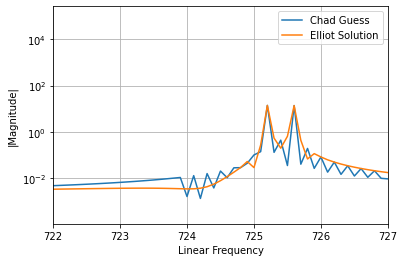

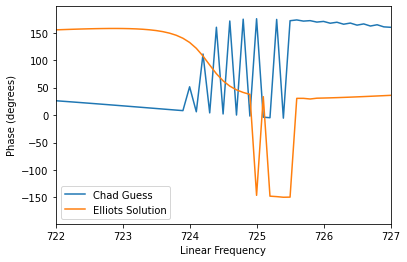

In [44]:
compare_frequency_spectra_solutions(w1_guess,w1_3dots,t_elliot,722,727)

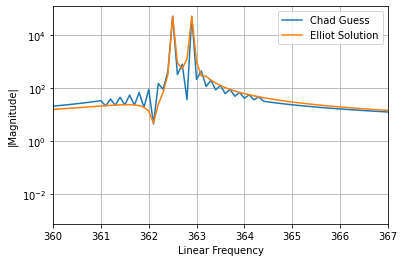

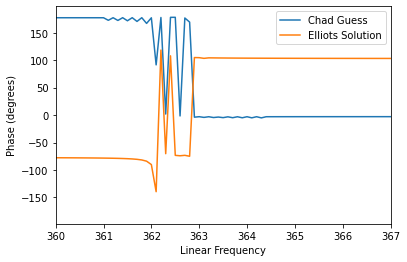

In [45]:
compare_frequency_spectra_solutions(u1_guess,u1_3dots,t_elliot,360,367)

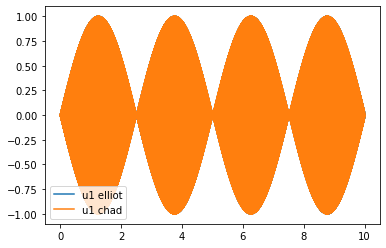

In [46]:
plt.figure()
plt.plot(t_elliot,u1_3dots,label='u1 elliot')
plt.plot(t_elliot,u1_guess,label='u1 chad')
#plt.xlim(0.2,0.3)
plt.legend()
plt.show()

In [47]:
u1_error = linalg.norm(u1_guess - u1_3dots) / linalg.norm(u1_3dots)
w1_error = linalg.norm(w1_guess - w1_3dots) / linalg.norm(w1_3dots)

In [48]:
print(u1_error,w1_error)

1.6234668997937256 0.00044782552342542036


In [49]:
Test_Radiated_Field = False
if Test_Radiated_Field:
    chi_rad = get_chi_rad(0,coefficients_guess,t_elliot)

In [50]:
if Test_Radiated_Field:
    error = linalg.norm(chi_rad - chi_2rad_elliot_3dots) / linalg.norm(chi_2rad_elliot_3dots)
    print('Field error',error)
    plt.figure()
    plt.plot(t_elliot,chi_rad,label='Chi Radiation Contribution Harmonic Balance Solution')
    plt.plot(t_elliot,chi_2rad_elliot_3dots,label='Chi Radiation Contribution Time-Domain Solution')
    plt.xlabel('Time (ps)')
    plt.xlim(0,0.15)
    plt.legend()
    plt.show()

iteration: 0 f mean 0.9428487250637236 f max 4.094445719162081
Jacobian Rank 1107 Num unknowns 1107


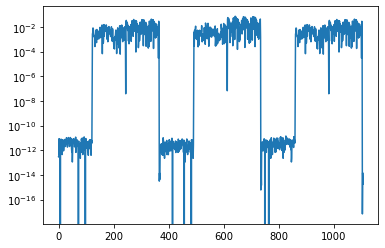

iteration: 1 f mean 0.007291853248181565 f max 0.07605641404006569
Jacobian Rank 1107 Num unknowns 1107


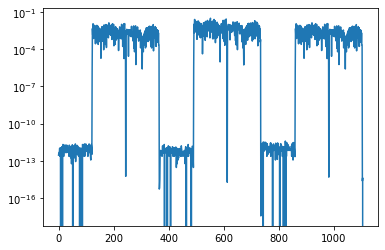

iteration: 2 f mean 0.002914797498199934 f max 0.03250638474855805
Jacobian Rank 1107 Num unknowns 1107


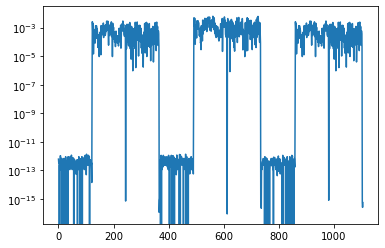

iteration: 3 f mean 0.0006423536524556385 f max 0.006359523565151903
Jacobian Rank 1107 Num unknowns 1107


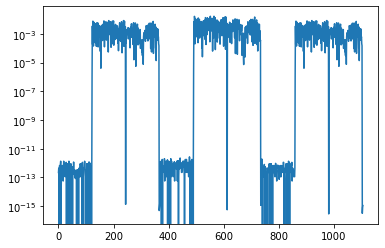

iteration: 4 f mean 0.001957224679319529 f max 0.017215439870540195
Jacobian Rank 1107 Num unknowns 1107


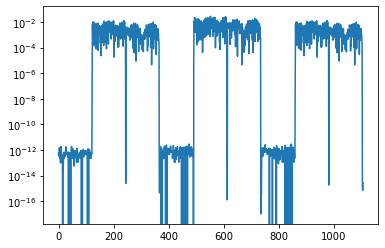

iteration: 5 f mean 0.002809656545362674 f max 0.0280255269240115
Jacobian Rank 1107 Num unknowns 1107


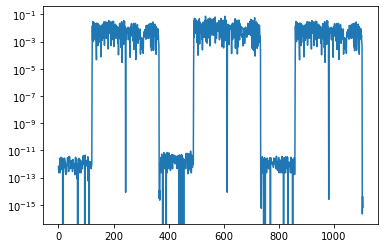

iteration: 6 f mean 0.007204826178645319 f max 0.07373084329719859
Jacobian Rank 1107 Num unknowns 1107


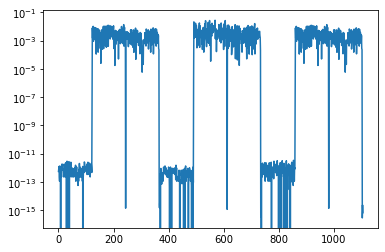

iteration: 7 f mean 0.0025338474341290197 f max 0.028030500193210628
Jacobian Rank 1107 Num unknowns 1107


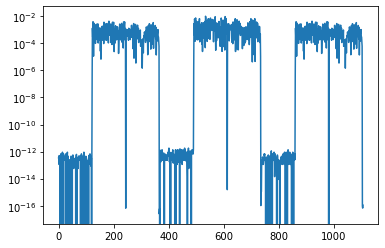

iteration: 8 f mean 0.0008554848748008662 f max 0.00996887726412865
Jacobian Rank 1107 Num unknowns 1107


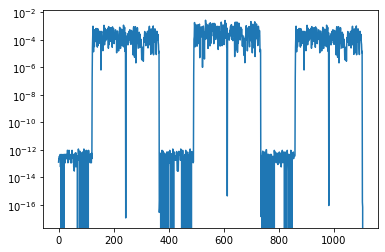

iteration: 9 f mean 0.00021508554940085392 f max 0.0025776989101018444
Jacobian Rank 1107 Num unknowns 1107


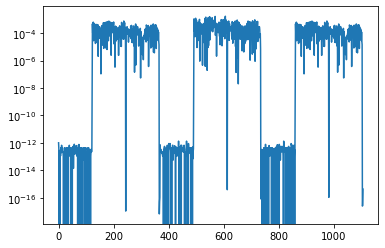

iteration: 10 f mean 0.0001544686614635367 f max 0.0016561121537961299
Jacobian Rank 1107 Num unknowns 1107


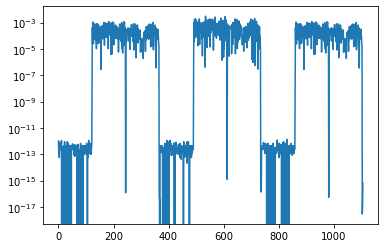

iteration: 11 f mean 0.00025412247235321347 f max 0.0029950278406261077
Jacobian Rank 1107 Num unknowns 1107


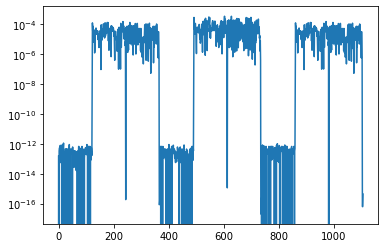

iteration: 12 f mean 2.9012618116876208e-05 f max 0.00034837733005588234
Jacobian Rank 1107 Num unknowns 1107


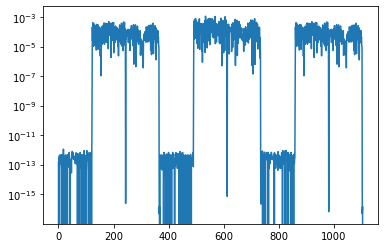

iteration: 13 f mean 0.00010170956981499784 f max 0.0011258362952446532
Jacobian Rank 1107 Num unknowns 1107


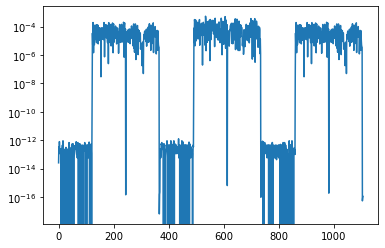

iteration: 14 f mean 4.1729680962618955e-05 f max 0.0005292436573540726
Jacobian Rank 1107 Num unknowns 1107


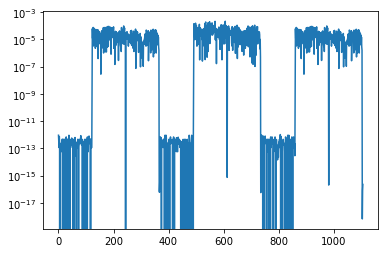

iteration: 15 f mean 1.9459069074307788e-05 f max 0.00021506377510149832
Jacobian Rank 1107 Num unknowns 1107


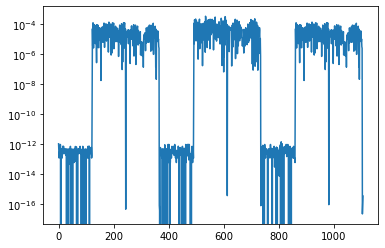

iteration: 16 f mean 2.7337049132318337e-05 f max 0.0003181123701381239
Jacobian Rank 1107 Num unknowns 1107


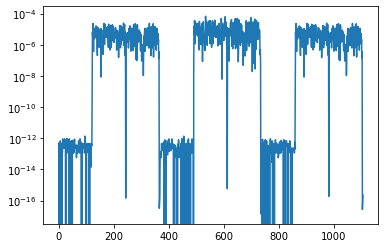

iteration: 17 f mean 4.9847459099158e-06 f max 6.78424541433742e-05
Converged after 17 iterations
0.0 minutes 11.43436574935913 seconds


In [51]:
with timer():
    coeff = Newton(coefficients_guess,t_k,eps=1e-5)

In [52]:
u1_sol = gamma@coeff[:,0]
v1_sol = gamma@coeff[:,1]
w1_sol = gamma@coeff[:,2]

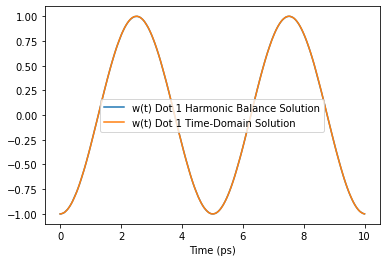

In [53]:
plt.figure()
plt.plot(t_elliot,w1_sol.real,label='w(t) Dot 1 Harmonic Balance Solution')
plt.plot(t_elliot,w1_3dots,label='w(t) Dot 1 Time-Domain Solution')
plt.xlabel('Time (ps)')
#plt.xlim(0,0.1)
plt.legend()
plt.show()

In [54]:
u1_3dots_error = linalg.norm(u1_sol - u1_3dots) / linalg.norm(u1_3dots)
v1_3dots_error = linalg.norm(v1_sol - v1_3dots) / linalg.norm(v1_3dots)
w1_3dots_error = linalg.norm(w1_sol - w1_3dots) / linalg.norm(w1_3dots)
print(u1_3dots_error,v1_3dots_error,w1_3dots_error)

0.0655703596650189 0.06557068712782993 0.0008494748445312929


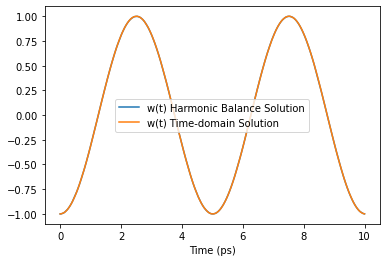

In [55]:
plt.figure()
plt.plot(t_elliot,w1_sol.real,label='w(t) Harmonic Balance Solution')
plt.plot(t_elliot,w1_3dots,label='w(t) Time-domain Solution')
plt.xlabel('Time (ps)')
#plt.xlim(0.3,0.5)
plt.legend()
plt.show()

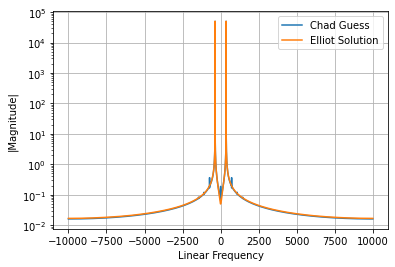

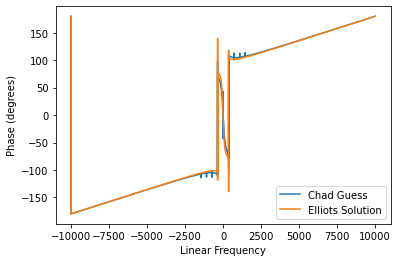

In [56]:
compare_frequency_spectra_solutions(u1_sol,u1_3dots,t_elliot)